<a href="https://colab.research.google.com/github/rhrjobdi/AI-4-Jobs/blob/main/Copy_of_(Student)SL_05_Data_Aquisition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Materials
- Scraping | BeautifulSoup4 | website legal untuk scraping
  - Prequisite: Basic HTML dan CSS Selector
  > Tetapi untuk materi ini cukup ketahui cara kerja dan gambaran umumnya saja. Jika tertarik lebih dalam mengenai HTML dan CSS (terutama CSS Selector) untuk Web Scraping, dapat menggunakan referensi berikut untuk belajar tambahan:
    - [Playlist Dasar HTML by WPU](https://www.youtube.com/playlist?list=PLFIM0718LjIVuONHysfOK0ZtiqUWvrx4F) | Video
    - [Dasar HTML by Petani Kode](https://www.petanikode.com/tutorial/html/) | Artikel
    - [Dasar HTML by W3School](https://www.w3schools.com/html/) | Artikel dan Lab Hands On
    - [CSS Selector by WPU](https://www.youtube.com/watch?v=0KLwWyQyMQo&list=PLFIM0718LjIUBrbm6Gdh6k7ZUvPIAZm7p&index=7) | Video
    - [CSS Selector by W3School](https://www.w3schools.com/cssref/css_selectors.asp) | Artikel dan Lab Hands On

- Import data dari file txt
- Bag of Word (sebelum preprocessing)
- Preprocessing
  - Tokenization
  - Stemming
  - Lemmatization
- Bag of Word (Setelah Preprocessing)

#1. Web Scraping


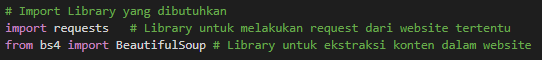

In [ ]:
#ketikkan kode diatas disini!
import requests
from bs4 import BeautifulSoup

Untuk website yang akan kita gunakan untuk scraping adalah website warstek.com. Website ini milik Coach Wayan dan sudah mendapatkan persetujuan untuk dijadikan objek web scraping :)

In [ ]:
result = requests.get("https://en.wikipedia.org/wiki/Manchester_United_F.C.")

In [ ]:
result

<Response [200]>

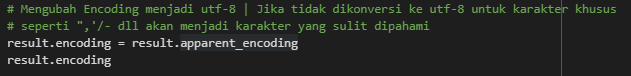

In [ ]:
# Mengubah Encoding menjadi utf-8 | Jika tidak dikonversi ke utf-8 untuk karakter khusus 
# seperti ",'/- dll akan menjadi karakter yang sulit dipahami
result.encoding = result.apparent_encoding
result.encoding

'utf-8'

In [ ]:
wp = BeautifulSoup(result.text, "html.parser")

Mengambil bagian html dengan tag 'p' paling awal (paragraph)
Silakan klik link wartek yang mengarah ke artikel https://warstek.com/kabel-laut/

Nah, pada artikel tersebut kita akan menemukan tag 'p' dengan klik kanan pada artikel lalu pilih 'Inspect'

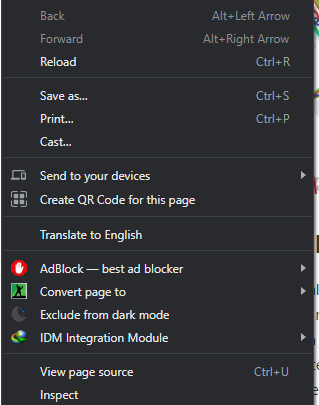

Lalu akan muncul seperti berikut,

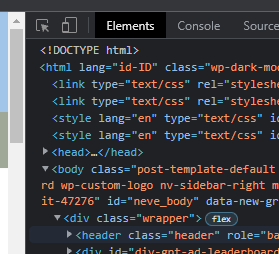

Tampilan tersebut merupakan struktur dasar dari halaman web yang berupa HTML. Struktur tersebut memiliki beberapa elemen dengan fungsinya masing - masing yang ditandai dengan adanya tag seperti `<p>`, `<img>`, `<a>`, `<table>`, `<div>` dll. 

Karena yang akan kita ambil adalah bagian konten teks dan konten teks tersebut tersimpan pada tag `<p>` (paragraph), maka kita akan menggunakan tag tersebut sebagai selector atau penanda.

Nah, pada bagian Element itu akan muncul html untuk tag 'p' tadi, kalo mau cepat nyarinya bisa dengan pencarian cepat dengan tekan CRTL + f lalu ketik p, maka akan lebih cepat nyarinya, atau bisa juga telusuri satu-satu. Nanti akan ktemu tag 'p' seperti dibawah ini:

Nahh, kira-kira demikian proses buat dapetin tag 'p'-nya.

Nah, pada bagian Element itu akan muncul html untuk tag 'p' tadi, kalo mau cepat nyarinya bisa dengan pencarian cepat dengan tekan CRTL + f lalu ketik p, maka akan lebih cepat nyarinya, atau bisa juga telusuri satu-satu. Anati akan ktemu tag 'p' seperti dibawah ini:

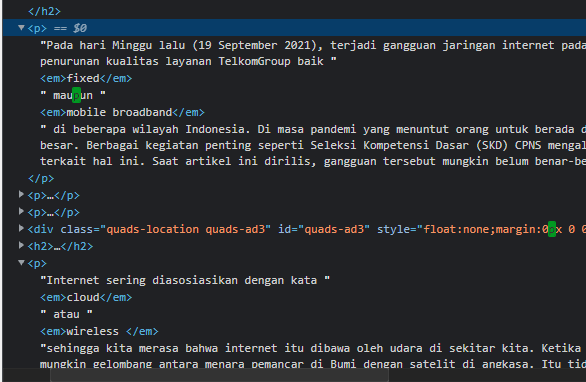

Nahh, kira-kira demikian proses buat dapetin tag 'p'-nya.

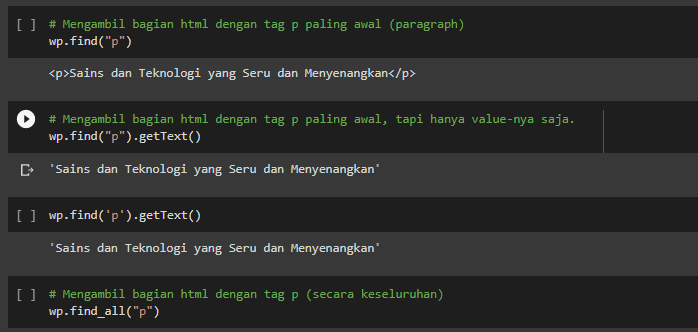

In [ ]:
# Mengambil bagian html dengan tag p paling awal (paragraph)
wp.find("p")

<p class="mw-empty-elt">
</p>

In [ ]:
# Mengambil bagian html dengan tag p paling awal, tapi hanya value-nya saja.
wp.find("p").getText()

'\n'

In [ ]:
wp.find('p').getText()

'\n'

In [ ]:
# Mengambil bagian html dengan tag p (secara keseluruhan)
wp.find_all()

[<html class="client-nojs" dir="ltr" lang="en">
 <head>
 <meta charset="utf-8"/>
 <title>Manchester United F.C. - Wikipedia</title>
 <script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"64b80bf0-3c3a-4564-9ba5-5d0ebf1d785c","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Manchester_United_F.C.","wgTitle":"Manchester United F.C.","wgCurRevisionId":1112518907,"wgRevisionId":1112518907,"wgArticleId":19961,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1: long volume value","Articles with short description","Short description is different from Wikidata","Wikipedia indefinitely move-prote

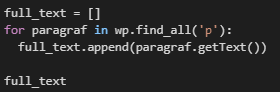

In [ ]:
#lengkapilah! sesuai kode diatas!
full_text = []
for paragraf in wp.find_all('p'):
  full_text.append(paragraf.getText())

full_text

['\n',
 'Manchester United Football Club, commonly referred to as Man United (often stylised as Man Utd), or simply United, is a professional football club based in Old Trafford, Greater Manchester, England. The club competes in the Premier League, the top division in the English football league system. Nicknamed the Red Devils, it was founded as Newton Heath LYR Football Club in 1878, but changed its name to Manchester United in 1902. The club moved from Newton Heath to its current stadium, Old Trafford, in 1910.\n',
 "Manchester United have won a record 20 League titles, 12 FA Cups, five League Cups, and a record 21 FA Community Shields. They have won the European Cup/UEFA Champions League three times, and the UEFA Europa League, the UEFA Cup Winners' Cup, the UEFA Super Cup, the Intercontinental Cup and the FIFA Club World Cup once each.[5][6] In 1968, under the management of Matt Busby, 10 years after eight of the club's players were killed in the Munich air disaster, they became t

> Terlihat bahwa link text masih banyak whitespace atau spasi kosong yang terdapat pada list sehingga perlu dibersihkan juga.

In [ ]:
# Menghapus None dari list full_text sekaligus membersihkan elemen list dari whitespace menggunakan fungsi strip()
# List Comprehension
full_text = [paragraf.strip() for paragraf in full_text if paragraf != ""]
full_text

['',
 'Manchester United Football Club, commonly referred to as Man United (often stylised as Man Utd), or simply United, is a professional football club based in Old Trafford, Greater Manchester, England. The club competes in the Premier League, the top division in the English football league system. Nicknamed the Red Devils, it was founded as Newton Heath LYR Football Club in 1878, but changed its name to Manchester United in 1902. The club moved from Newton Heath to its current stadium, Old Trafford, in 1910.',
 "Manchester United have won a record 20 League titles, 12 FA Cups, five League Cups, and a record 21 FA Community Shields. They have won the European Cup/UEFA Champions League three times, and the UEFA Europa League, the UEFA Cup Winners' Cup, the UEFA Super Cup, the Intercontinental Cup and the FIFA Club World Cup once each.[5][6] In 1968, under the management of Matt Busby, 10 years after eight of the club's players were killed in the Munich air disaster, they became the f

In [ ]:
full_text = ' '.join(full_text)
full_text

' Manchester United Football Club, commonly referred to as Man United (often stylised as Man Utd), or simply United, is a professional football club based in Old Trafford, Greater Manchester, England. The club competes in the Premier League, the top division in the English football league system. Nicknamed the Red Devils, it was founded as Newton Heath LYR Football Club in 1878, but changed its name to Manchester United in 1902. The club moved from Newton Heath to its current stadium, Old Trafford, in 1910. Manchester United have won a record 20 League titles, 12 FA Cups, five League Cups, and a record 21 FA Community Shields. They have won the European Cup/UEFA Champions League three times, and the UEFA Europa League, the UEFA Cup Winners\' Cup, the UEFA Super Cup, the Intercontinental Cup and the FIFA Club World Cup once each.[5][6] In 1968, under the management of Matt Busby, 10 years after eight of the club\'s players were killed in the Munich air disaster, they became the first En

#2. Crawling Data From Tweeter

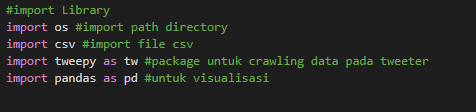

In [ ]:
#import Library
 #import path directory
 #import file csv
 #package untuk crawling data pada tweeter
 #untuk visualisasi


In [ ]:
#emanggil data dari tweeter menggunakan API 
access_token = "3760416139-MLn5ifjLKCSXh4dWrgmOsSpQ6lYvefNkbQNuM35"
access_token_secret ="KsKpKqYwCli8YDNJg15y8ZW0quVlfGwrUCrOX4xLZHMaE"
consumer_key ="gchYjFhHc48sIveGC8fMVa2Sw"
consumer_secret="F4wR4cp8CIcAhkUgVFtrOZDg9CDKaroN9O0dkh2vSxgubnoKCb"

cara mengambil token data pada tweeter dengan API:

https://youtu.be/ECPjw0w-qK0

In [ ]:
auth = tw.OAuthHandler(consumer_key, consumer_secret) #memanggil data concumer_key, consumer_secret
auth.set_access_token(access_token, access_token_secret) #memanggil access_token, access_token_secret
api = tw.API(auth, wait_on_rate_limit=True) #autentifikasi ke twitter

pencarian topik

In [ ]:
search_words = "kampusmerdeka"

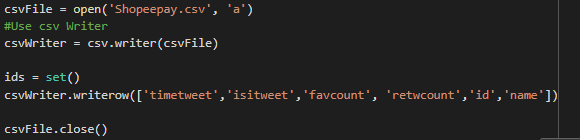

In [ ]:
#Lengkapilah code berikut sesuaikan pada kode diatas!

csvFile = ___('Shopeepay.csv', 'a')
#Use csv Writer
csvWriter = csv.__(csvFile)

ids = set()
____.writerow(['timetweet','isitweet','favcount', 'retwcount','id','name'])

csvFile.___()

In [ ]:
csvFile = open('Shopeepay.csv', 'a')
#Use csv Writer
csvWriter = csv.writer(csvFile)

ids = set()

for tweet in  tw.Cursor(api.search,
                   q=search_words,
                   date ='2020-12-12', 
                   lang='id', 
                   tweet_mode = 'extended').items(90000):
  #if (not tweet.retweeted) and ('RT @' not in tweet.full_text):
    #Write a row to the csv file/ I use encode utf-8
    csvWriter.writerow([tweet.created_at, tweet.full_text.encode('utf_8'), tweet.favorite_count, tweet.retweet_count, tweet.id, tweet.user.screen_name])
    #print "...%s tweets downloaded so far" % (len(tweet.id))
    ids.add(tweet.id) # add new id
    #print ("number of unique ids seen so far: {}",format(len(ids)))
csvFile.close()

In [ ]:
#with open(path, 'rb') as f: contens = f.read()
df = pd.read_csv('Shopeepay.csv')
df.head()

timetweet                                           isitweet  \
0  2022-08-12 03:12:22  b'Diskon hingga Rp100.000 beli tiket event pak...   
1  2022-08-12 03:06:35  b'OPEN JASA PENCAIRAN GESTUN/CV LIMIT SHOPEEPA...   
2  2022-08-12 03:01:50  b'Mun rumah bisa shopeepaylater 7 turunan mah ...   
3  2022-08-12 02:59:01  b'\xf0\x9f\x92\xb5 1\nYuk yang mau Gestun bisa...   
4  2022-08-12 02:34:54  b'\xe2\x9c\xa8Proof\xe2\x9c\xa8\nTransaksi ges...   

   favcount  retwcount                   id           name  
0         0          0  1557927948183048194       loketcom  
1         0          0  1557926493199937536  Wegethershop_  
2         0          0  1557925299416809472       jauhann_  
3         0          0  1557924589480869889       beslanja  
4         0          0  1557918519295373312   hellowjunnie

In [ ]:
len(df.index)

364